<a href="https://colab.research.google.com/github/joy22581/Airbnb/blob/main/Fullcode_ML_additional_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

Airbnb is an online platform that allows people to rent short-term accommodation. This ranges from regular people with a spare bedroom to property management firms who lease multiple rentals. On the one side, Airbnb enables owners to list their space and earn rental money. On the other side, it provides travelers easy access to renting private homes.

Airbnb receives commissions from two sources upon every booking, namely from the hosts and guests. For every booking, Airbnb charges the guest 6-12% of the booking fee. Moreover, Airbnb charges the host 3% for every successful transaction.

As a senior data scientist at Airbnb, you have to come up with a pricing model that can effectively predict the Rent for accommodation and can help hosts, travelers, and also the business in devising profitable strategies.

### Objective

To explore and visualize the data, build a linear regression model to predict the prices of Airbnb rental rooms, and generate a set of insights and recommendations that will help the business.

### Data Description

The data contains information about the different types of rental rooms offered by Airbnb over a fixed period of time. The detailed data dictionary is given below.

**Data Dictionary**

- id: Property ID
- room_type: Type of Room in the property
- accommodates: How many adults can this property accommodate
- bathrooms: Number of bathrooms on the property
- cancellation_policy: Cancellation policy of the property
- cleaning_fee: This denotes whether the property cleaning fee is included in the rent or not
- instant_bookable: It indicates whether an instant booking facility is available or not
- review_scores_rating: Review rating score of the property
- bedrooms: Number of bedrooms in the property
- beds: Total number of beds in the property
- log_price: Log of the rental price of the property for a fixed period. [If the price is 12000 dollars, then log_price represents log(12000)]

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 10.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn_pandas as sp

sns.set()

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/Python/air1.csv")


Mounted at /content/drive


## Data Overview

Checking the data shape and info  

In [120]:
data.shape

(74111, 11)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [122]:
# Making a copy of the dataset
df=data.copy()
df

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [123]:
#Checking the shape of df before deleting duplicate values
df.shape

(74111, 11)

In [124]:
#Checking the head of the data
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [125]:
# drop the id column as it does not add any value to the analysis
df.drop("id", axis=1, inplace=True)

In [126]:
# Finding and dropping duplicate values and finding the new shape
df.drop_duplicates(inplace=True)
df.shape

(54117, 10)

Converting log to the actual price (EDA)

In [127]:
# Computing the actual price from the log price. Base e has been used
df['act_price'] = np.exp(df["log_price"])
df['act_price']=df['act_price'].round()
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,act_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635,150.0
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899,169.0
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734,145.0
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073,750.0
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932,115.0


In [128]:
# Changing act_price dtype to 'int'
df['act_price']=df['act_price'].astype(int)

Checking the Datatype and other info for df

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54117 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             54112 non-null  object 
 1   accommodates          54114 non-null  float64
 2   bathrooms             53922 non-null  float64
 3   cancellation_policy   54109 non-null  object 
 4   cleaning_fee          54113 non-null  object 
 5   instant_bookable      54117 non-null  object 
 6   review_scores_rating  43902 non-null  float64
 7   bedrooms              54025 non-null  float64
 8   beds                  53992 non-null  float64
 9   log_price             54117 non-null  float64
 10  act_price             54117 non-null  int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 5.0+ MB


Checking the statistical values for the numerical dtypes

In [130]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
accommodates,54114.0,4.0,2.0,1.0,2.0,3.0,4.0,16.0
bathrooms,53922.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0
review_scores_rating,43902.0,93.0,8.0,20.0,90.0,95.0,99.0,100.0
bedrooms,54025.0,1.0,1.0,0.0,1.0,1.0,2.0,10.0
beds,53992.0,2.0,1.0,0.0,1.0,1.0,2.0,18.0
log_price,54117.0,5.0,1.0,0.0,4.0,5.0,5.0,8.0
act_price,54117.0,178.0,188.0,1.0,79.0,125.0,200.0,1999.0


In [131]:
df.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 195
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    10215
bedrooms                   92
beds                      125
log_price                   0
act_price                   0
dtype: int64

In [132]:
total_null=df.isnull().sum().sum()
print(total_null)

#converting the variable to a string in order to concatenate

total_null=total_null.astype("str")

10647


In [133]:
print("There are a total of " + total_null + " null values in the dataframe. We will treat them in the data preprocessing section below")

There are a total of 10647 null values in the dataframe. We will treat them in the data preprocessing section below


Creating non numerical columns list and numeric columns list

In [134]:
# Create non numerical column list
nonnumeric_columns = df.select_dtypes(exclude=np.number).columns.tolist()
nonnumeric_columns

['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable']

In [135]:
# Create numerical column list
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['accommodates',
 'bathrooms',
 'review_scores_rating',
 'bedrooms',
 'beds',
 'log_price',
 'act_price']

In [136]:
#Checking the value counts for ratings. 10215 properties have no rating
df['review_scores_rating'].value_counts(dropna=False)

NaN      10215
100.0     9794
98.0      3265
96.0      3156
97.0      3149
95.0      2940
93.0      2937
90.0      2382
94.0      2145
99.0      2123
80.0      1835
92.0      1820
91.0      1442
89.0      1020
87.0      1018
88.0       974
85.0       594
86.0       484
84.0       423
60.0       415
83.0       390
82.0       210
70.0       194
73.0       155
81.0       123
75.0       100
20.0        97
78.0        93
40.0        88
79.0        83
76.0        76
77.0        72
67.0        66
74.0        39
72.0        37
50.0        30
65.0        28
68.0        20
71.0        14
69.0        13
64.0        10
63.0        10
53.0        10
47.0         5
30.0         4
55.0         3
66.0         3
62.0         3
57.0         3
27.0         2
58.0         1
35.0         1
49.0         1
54.0         1
56.0         1
Name: review_scores_rating, dtype: int64

In [137]:
#Checking the bedroom distribution for properties that do not have a rating
df.loc[df['review_scores_rating'].isnull()==True,'bedrooms'].value_counts(dropna=False)

1.0     5673
2.0     2017
0.0     1041
3.0      963
4.0      342
5.0       98
6.0       42
NaN       21
7.0        7
10.0       5
9.0        4
8.0        2
Name: bedrooms, dtype: int64

In [138]:
#Replace instant bookable to a boolean
df.instant_bookable.replace(["f", "t"], [False, True], inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How are the prices (log_price) of properties distributed?
2. What is the market share of different cancellation policies?
3. How does the price (log_price) of a property vary by the number of bedrooms?
4. How does the price (log_price) of a property vary by the number of accommodates?
5. What are the attributes that have a strong correlation with the price (log_price) of the property?



## Univariate Analysis

In [139]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [140]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Log Price

The log price has a normal distribution with slight left skew a mean and median of around 5 which is price of around $148. There are outliers below Q1 and above Q4

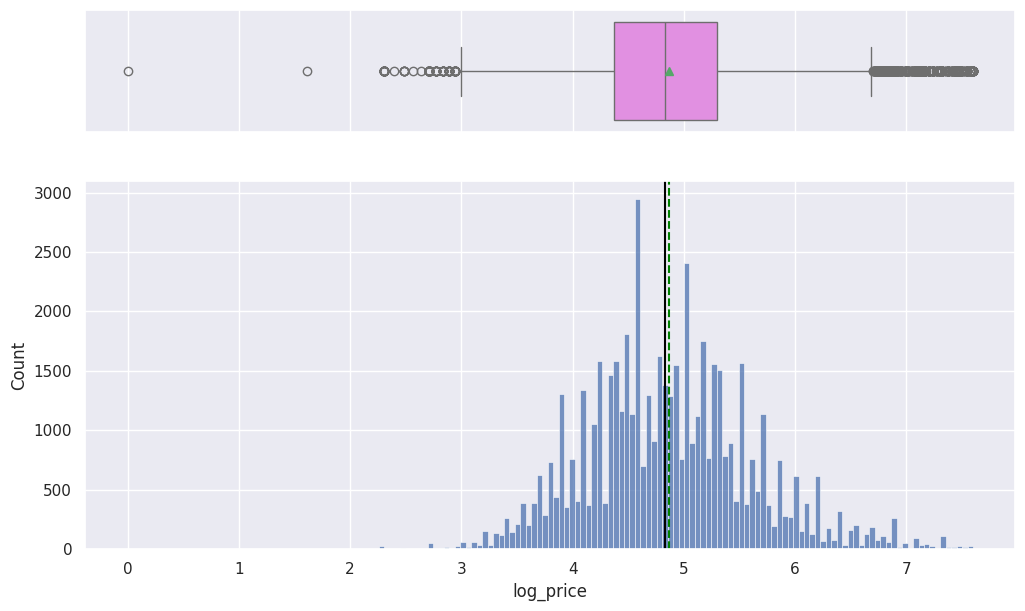

In [141]:
histogram_boxplot (df,'log_price', figsize=(12, 7), kde=False, bins=None)

#### Price

The price has a right skew with slight left skew a mean of $178 and median of $125. 75% of the price is below $200. There are outliers above Q4

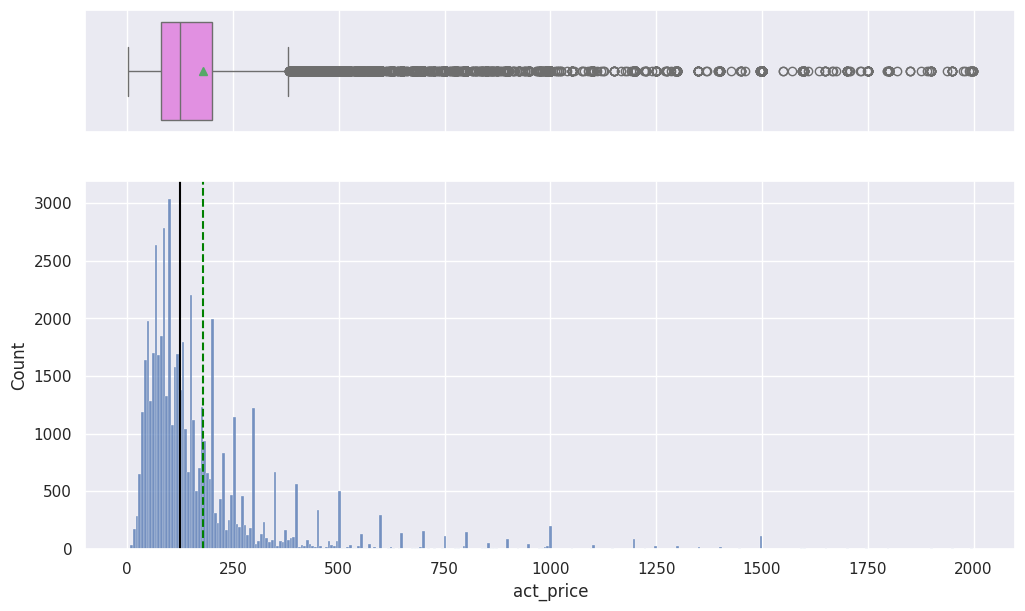

In [142]:
histogram_boxplot (df,'act_price', figsize=(12, 7), kde=False, bins=None)

#### Bedrooms

The bedrooms has a right skew distribution a mean and median of 1 with 75% properties having a maximum of 2 bedrooms. 60% of properties have 1 bedroom followed by 19% for 2 bedrooms and 10% for studios. There are outliers above Q4

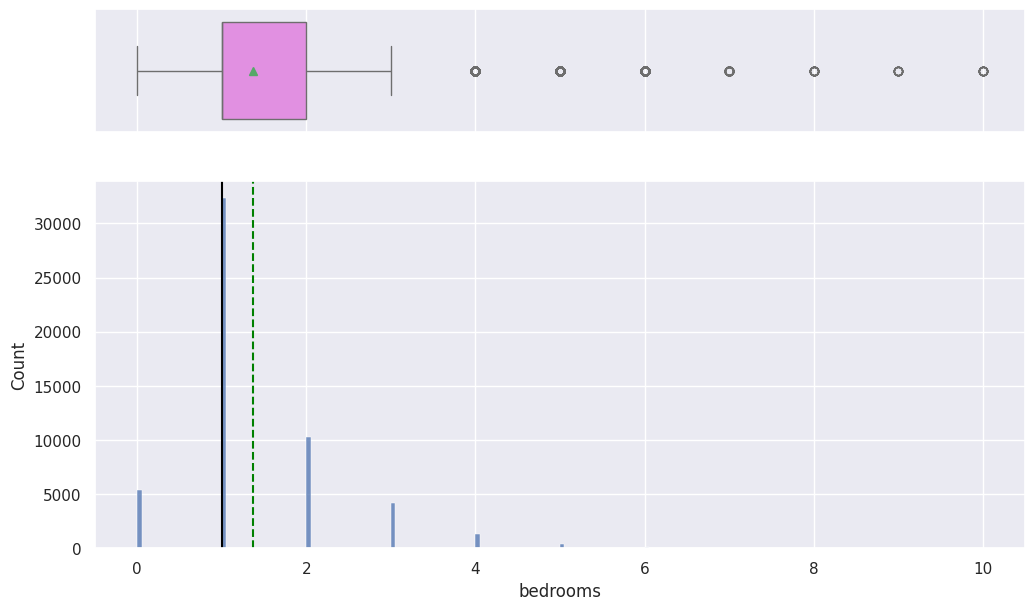

In [143]:
histogram_boxplot (df,'bedrooms', figsize=(12, 7), kde=False, bins=None)

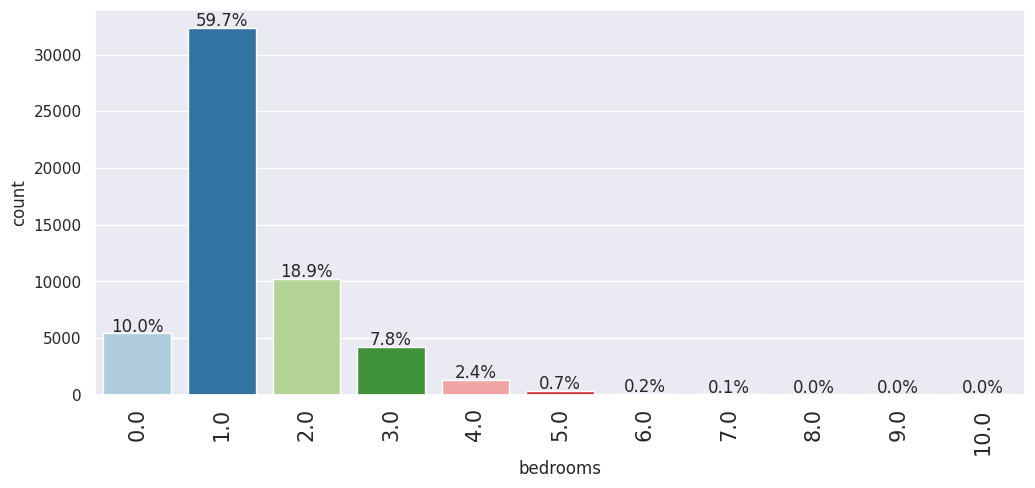

In [144]:
 labeled_barplot(df, "bedrooms", perc=True)

#### Bathrooms

The bedrooms has a right skew distribution a mean and median of 1 with 75% properties having a maximum of 2 bathrooms. 72% of properties have 1 bathroom followed by 6.5% for 2 bathrooms and 13.5% for 2 bathrooms. There are outliers above Q4

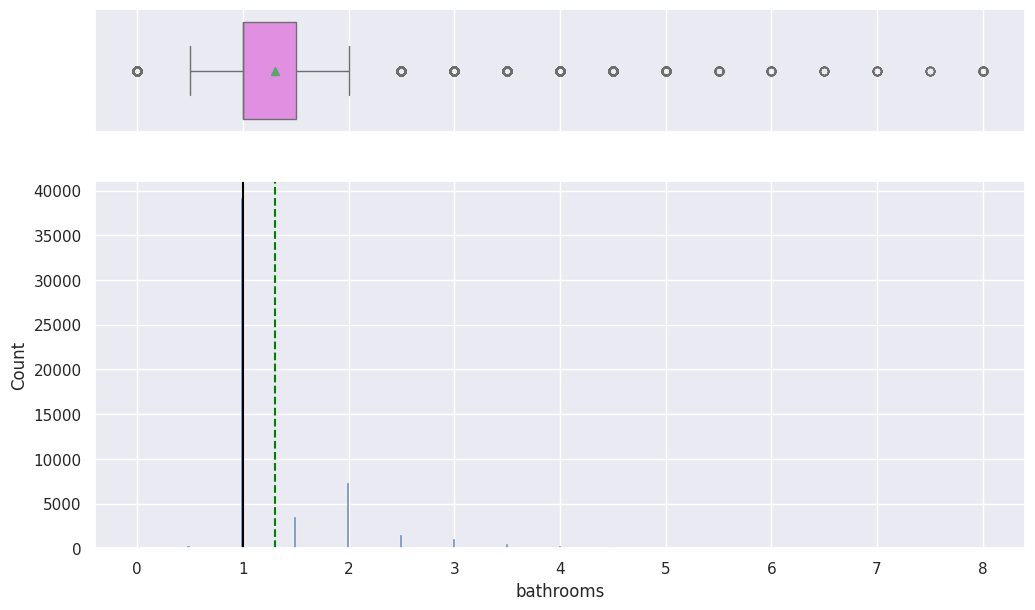

In [145]:
histogram_boxplot (df,'bathrooms', figsize=(12, 7), kde=False, bins=None)

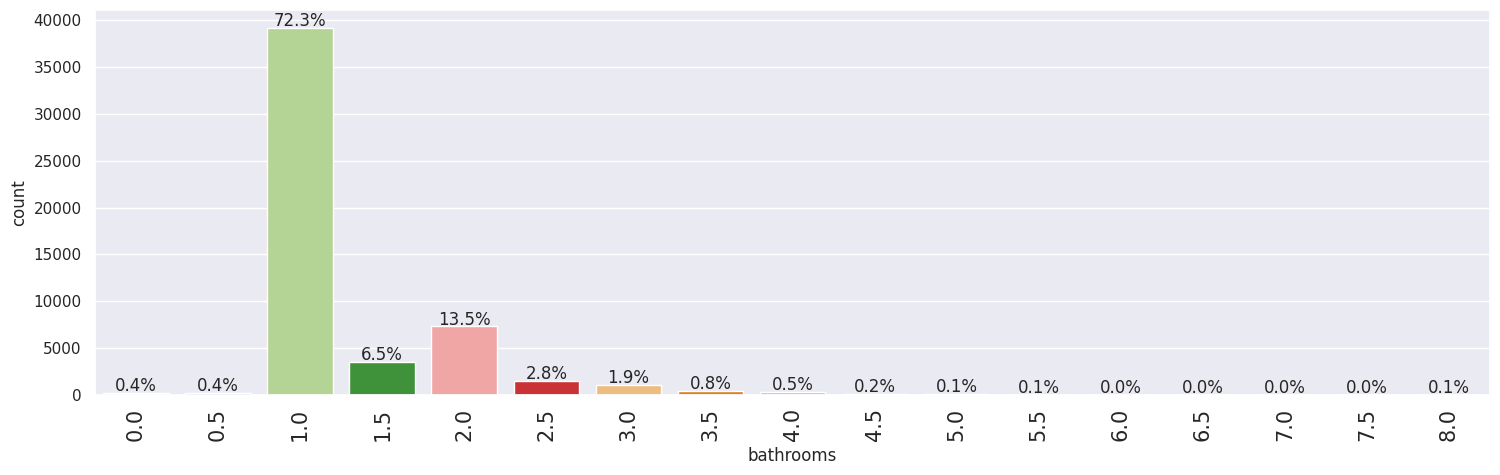

In [146]:
labeled_barplot(df, "bathrooms", perc=True)

#### Beds

The beds has a right skew distribution a mean of 2 and median of 1 with 75% properties having a maximum of 2 beds. 51% of properties have 1 bed followed by 27% having 2 beds and 11% having 3 beds. There are outliers above Q4

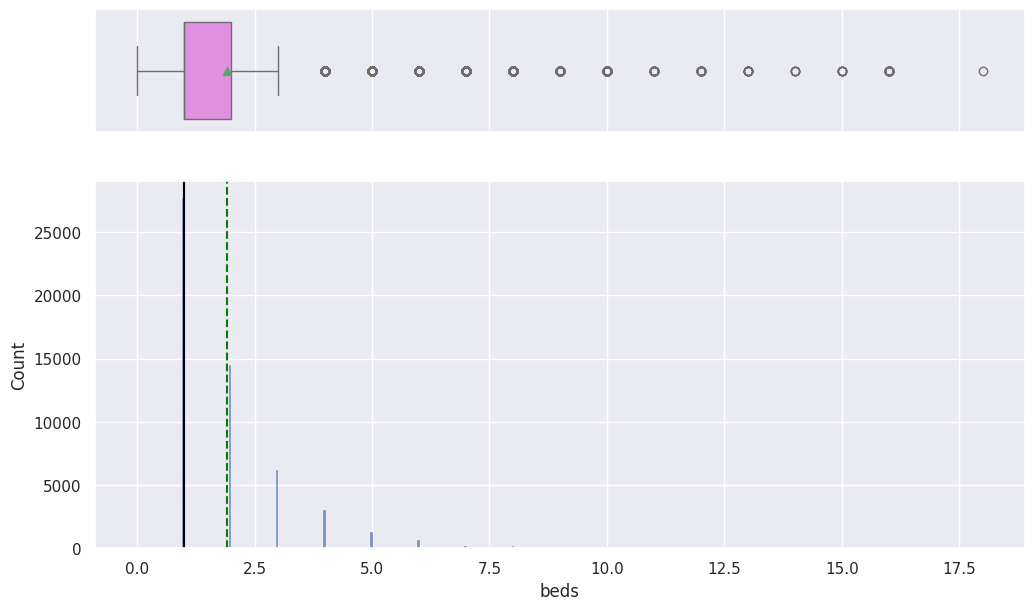

In [147]:
histogram_boxplot (df,'beds', figsize=(12, 7), kde=False, bins=None)

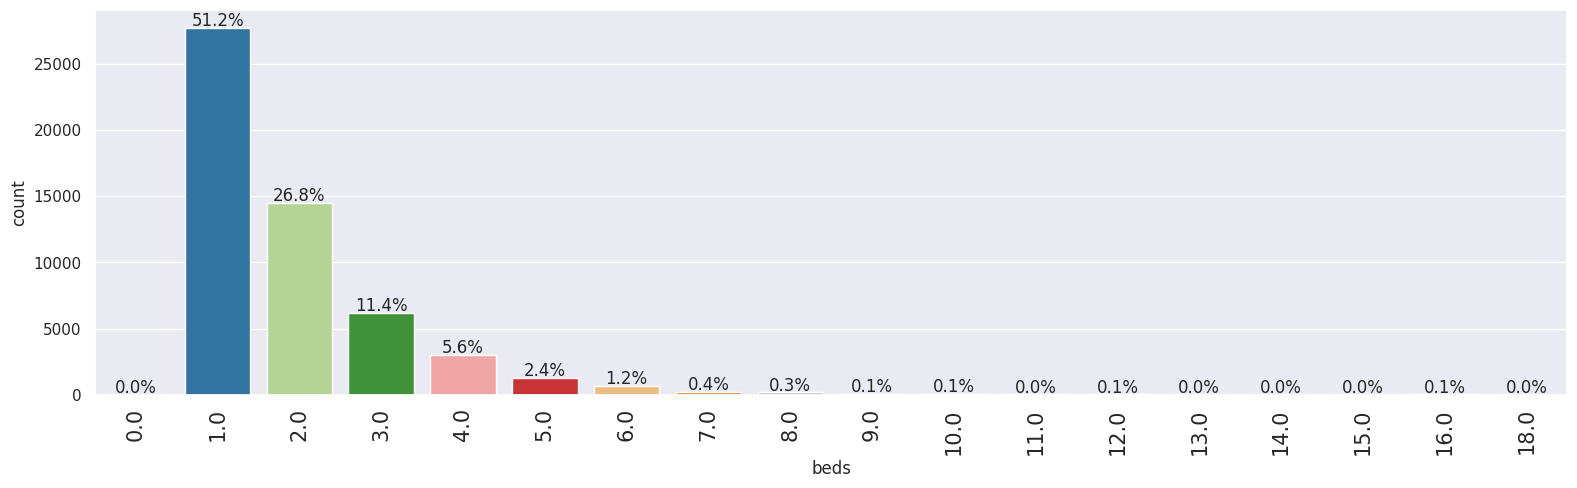

In [148]:
labeled_barplot(df, "beds", perc=True)

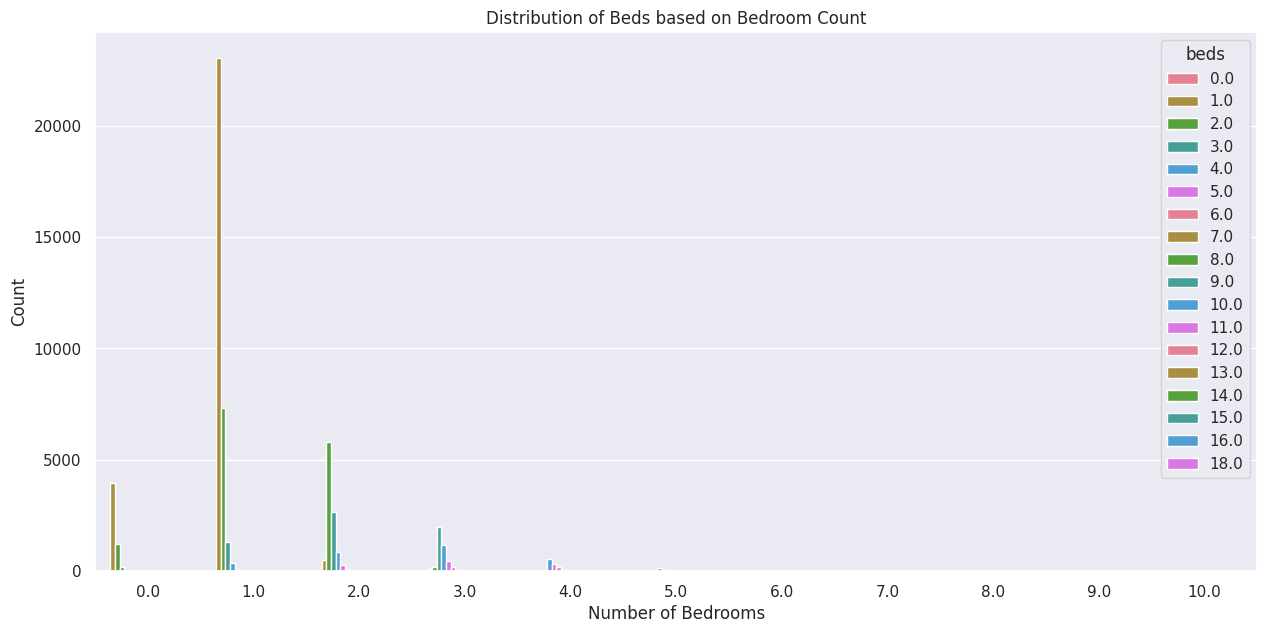

In [149]:
# Use a seaborn preset palette
palette = sns.color_palette("husl", 6)  # 'husl' palette with 6 colors

# Assuming 'df' is your DataFrame
plt.figure(figsize=(15, 7))
sns.countplot(x='bedrooms', hue='beds', data=df, palette=palette)
plt.title('Distribution of Beds based on Bedroom Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

#### Review Score

The review score has a left skew distribution a mean of 93 and median of 95 with 75% properties having a rating upto 99.There are outliers below **Q1**

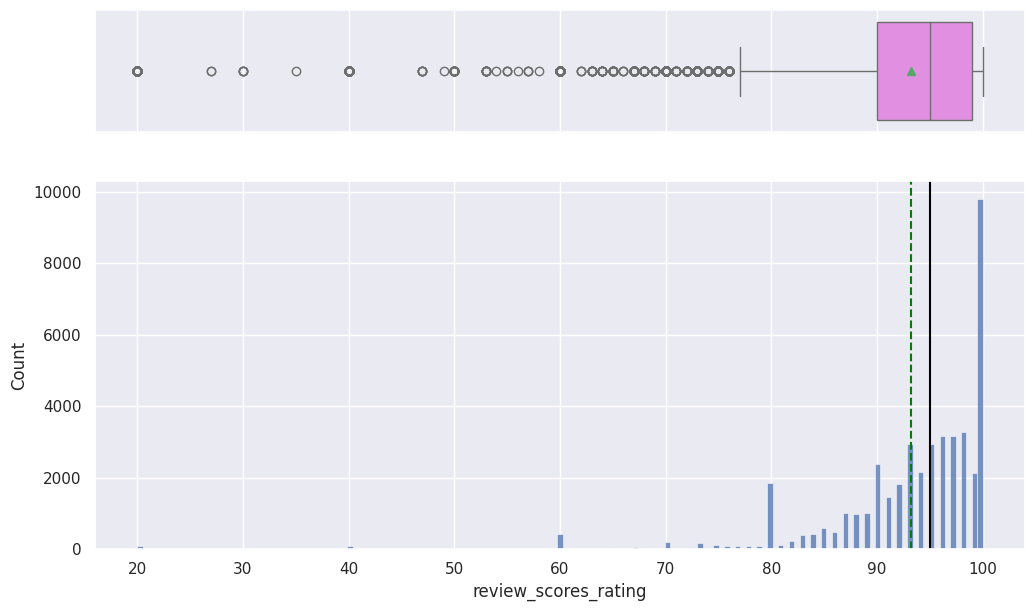

In [150]:
histogram_boxplot (df,'review_scores_rating', figsize=(12, 7), kde=False, bins=None)

#### Accommodates

The accomodates has a right skew distribution a mean of 4 and median of 3 with 75% properties having the ability to accomodate 4 .There are outliers above Q4

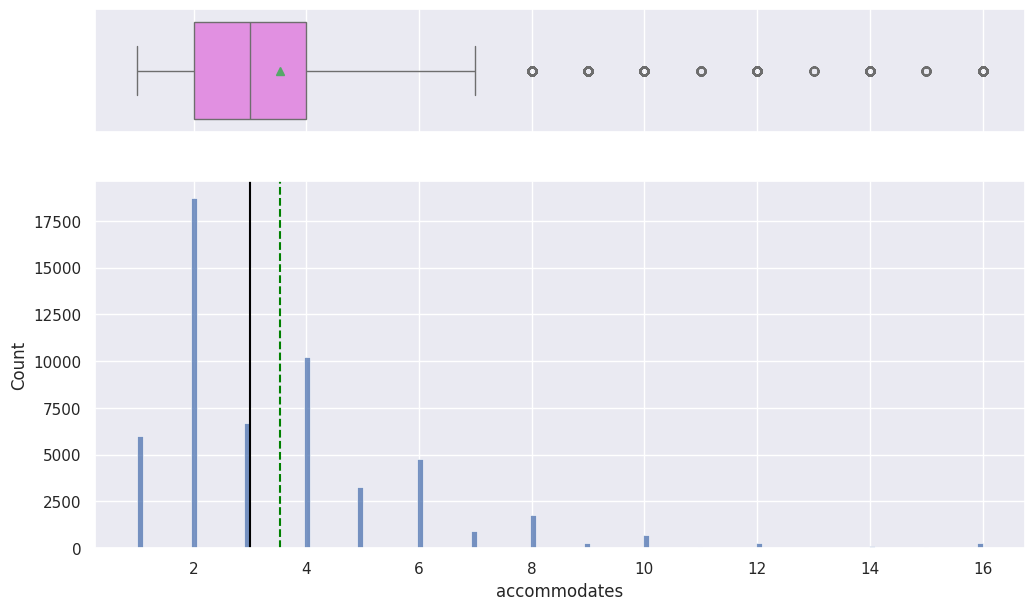

In [151]:
histogram_boxplot (df,'accommodates', figsize=(12, 7), kde=False, bins=None)

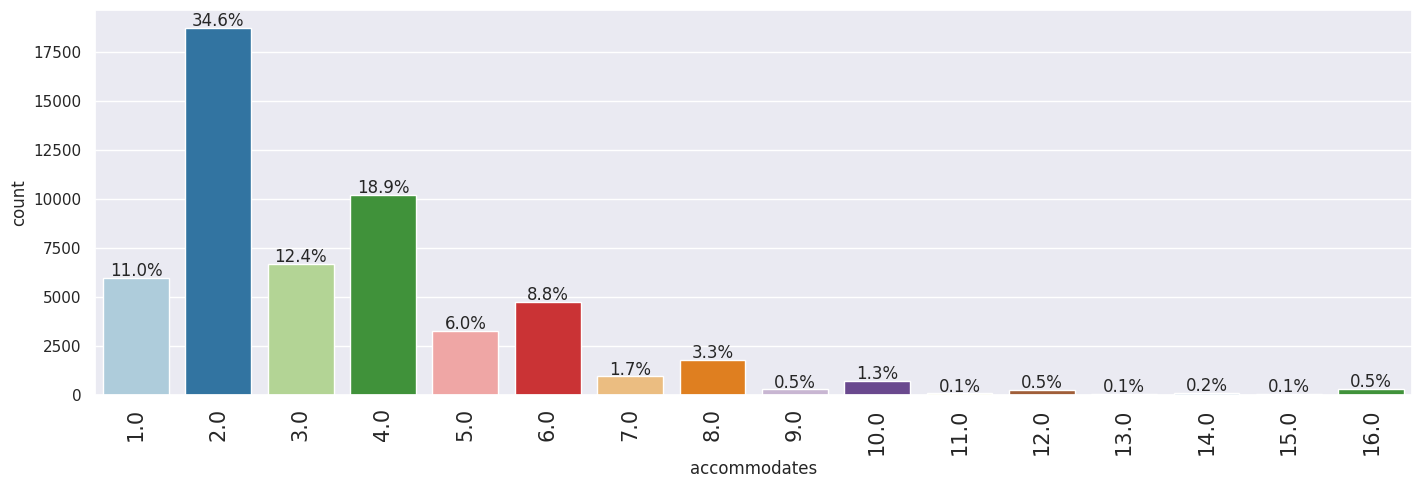

In [152]:
labeled_barplot(df, "accommodates", perc=True)

#### Room Type

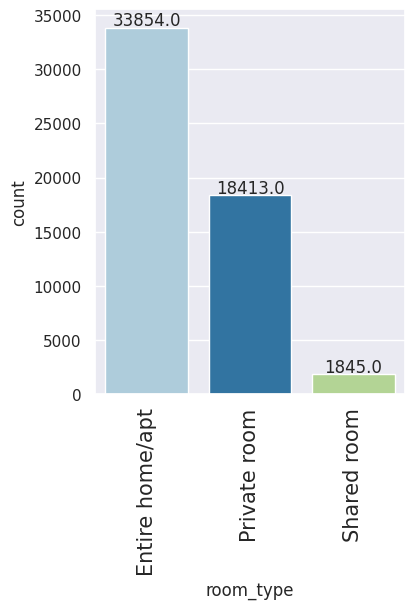

In [153]:
labeled_barplot(df,'room_type', perc=False, n=None)

#### Instant Bookable

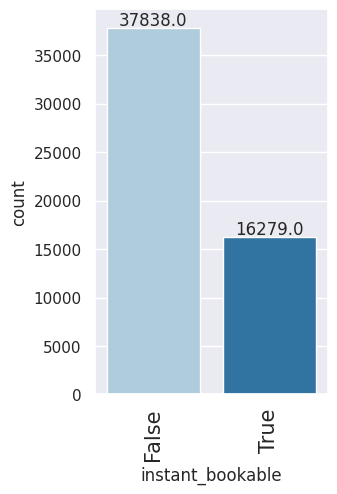

In [154]:
labeled_barplot(df,'instant_bookable', perc=False, n=None)

#### Cancellation Policy

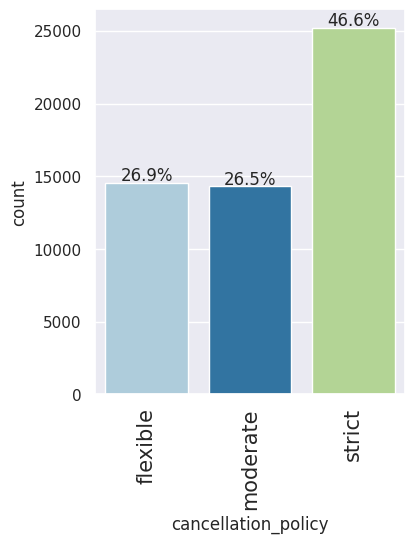

In [155]:
labeled_barplot(df,'cancellation_policy', perc=True, n=None)

As seen above, the 'Strict' cancellation policy dominates as almost half the properties (approx 47%) have a 'Strict' cancellation policy. 'Flexible' and 'Moderate' policies are around 26% each.

#### Cleaning Fee

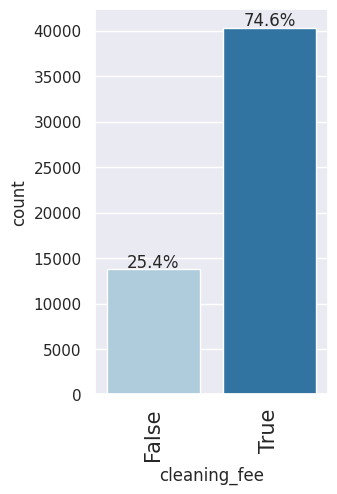

In [156]:
labeled_barplot(df,'cleaning_fee', perc=True, n=None)

As seen above, 76% of properties have a cleaning fee

## Bivariate Analysis

In [157]:
# Filter columns with data type 'float64'
float64_columns = df.select_dtypes(include=['float64','int64']).columns

# Print the list of column names with data type 'float64'
float64_columns

Index(['accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds',
       'log_price', 'act_price'],
      dtype='object')

<Figure size 1200x700 with 0 Axes>

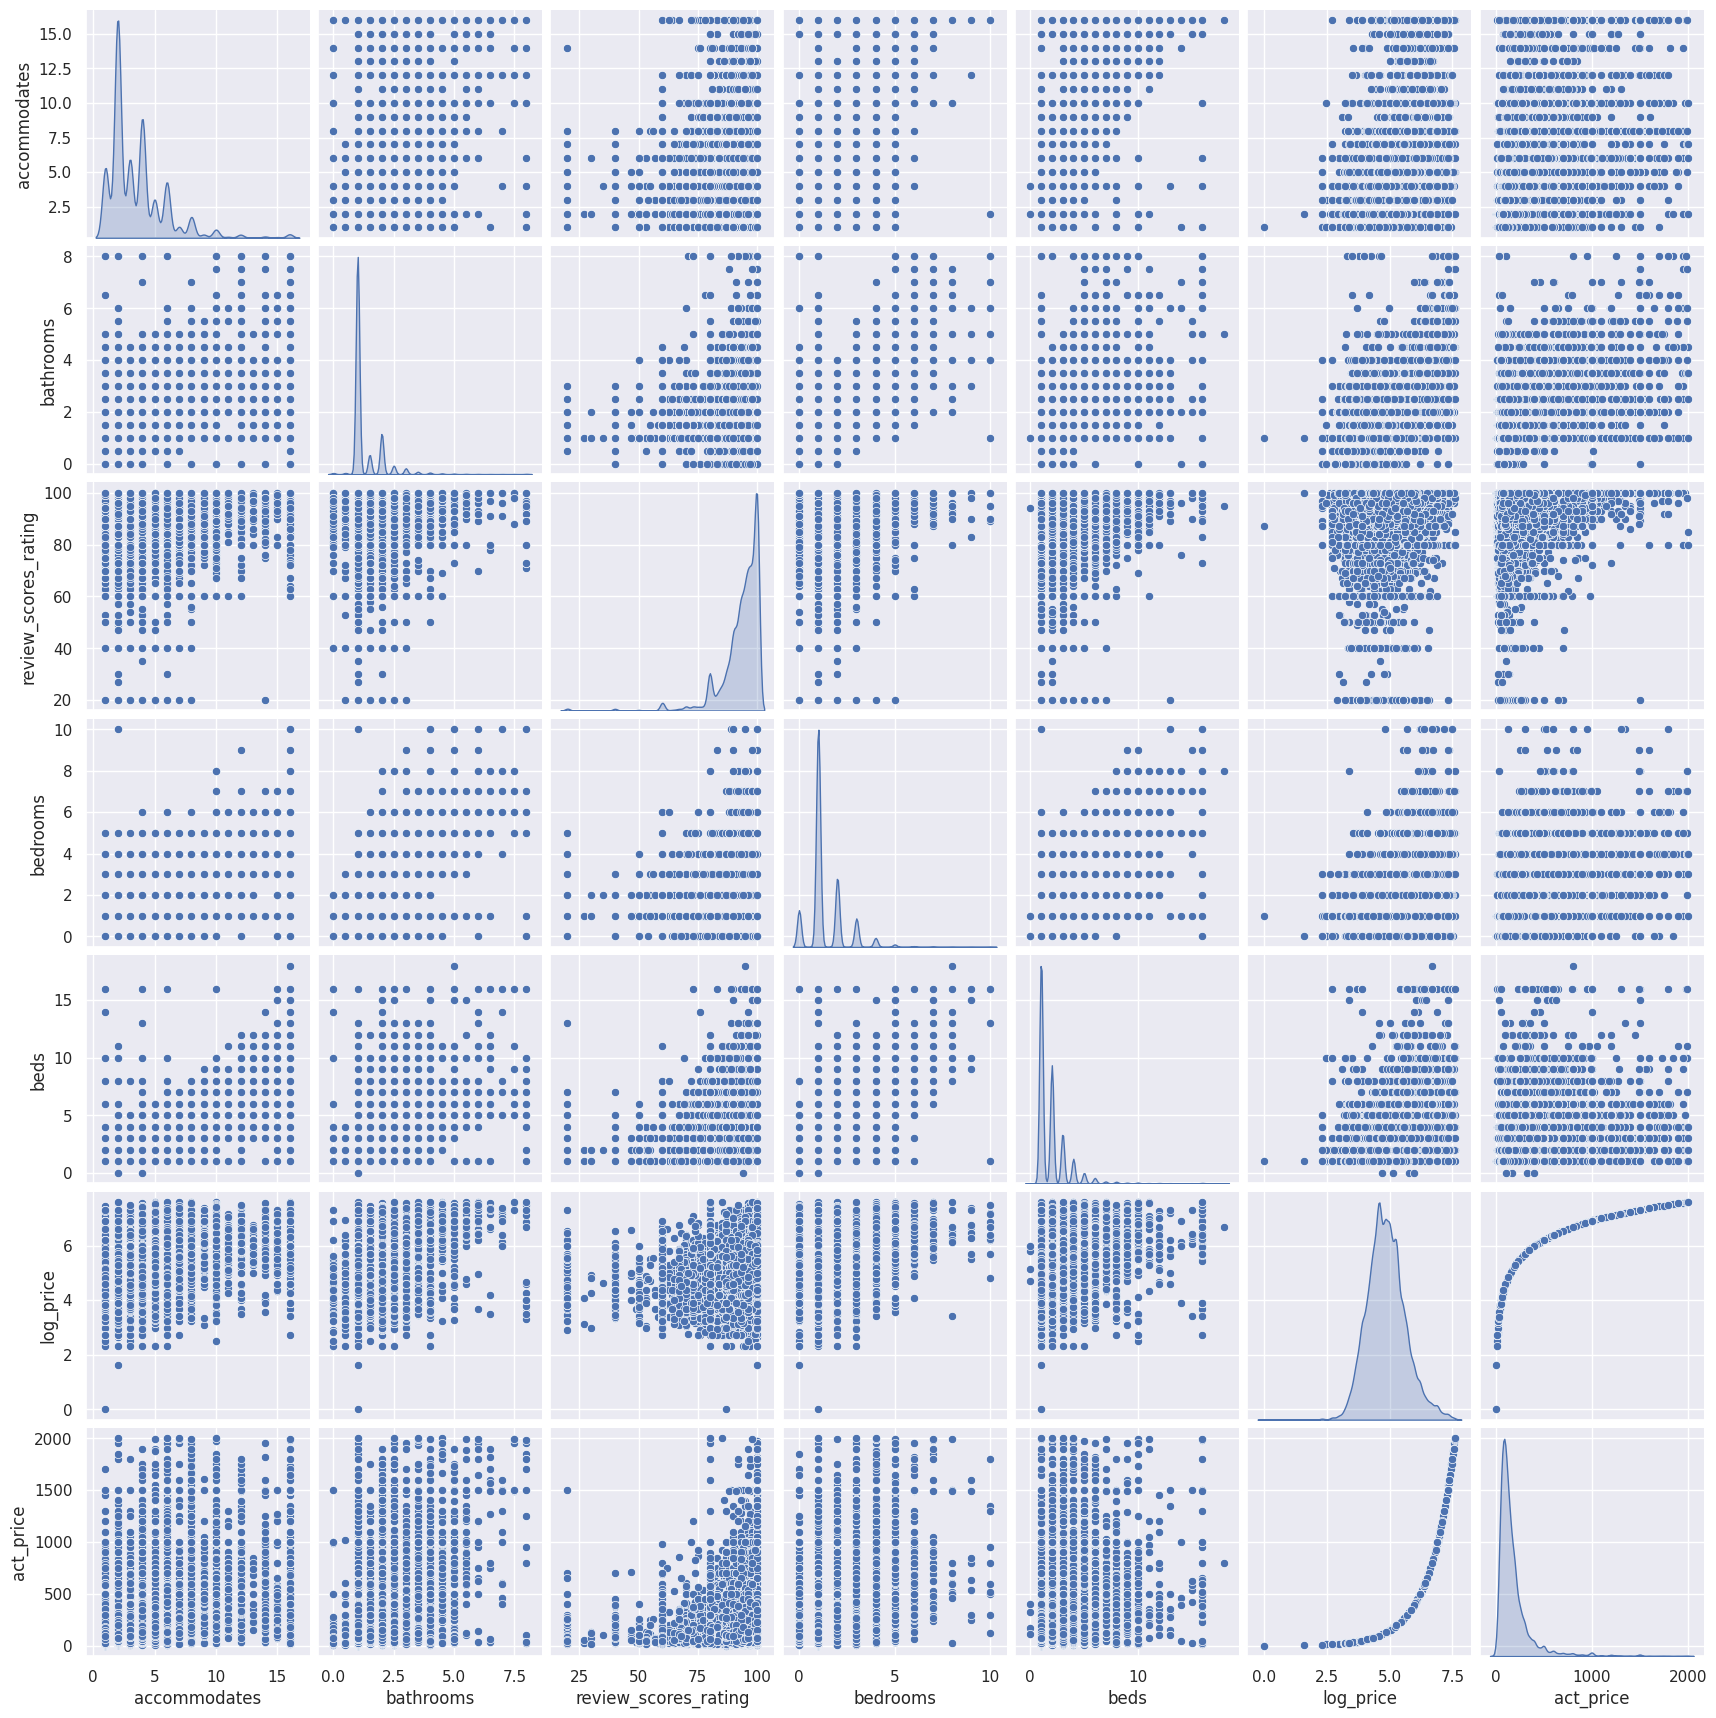

In [158]:
# Set a suitable figure size
plt.figure(figsize=(12, 7))

# Create a pair plot with the filtered DataFrame
sns.pairplot(df[float64_columns], diag_kind='kde')

# Show the pair plot
plt.show()

In [159]:
# Creating a new dataframe with features that are of int and float
numeric_df = df.select_dtypes(include=np.number)
numeric_df

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,act_price
0,3.0,1.0,100.0,1.0,1.0,5.010635,150
1,7.0,1.0,93.0,3.0,3.0,5.129899,169
2,5.0,1.0,92.0,1.0,3.0,4.976734,145
3,4.0,1.0,NaN,2.0,2.0,6.620073,750
4,2.0,1.0,40.0,0.0,1.0,4.744932,115
...,...,...,...,...,...,...,...
74104,2.0,1.0,100.0,1.0,1.0,4.356709,78
74107,4.0,2.0,93.0,2.0,4.0,5.043425,155
74108,5.0,1.0,94.0,2.0,2.0,5.220356,185
74109,2.0,1.0,NaN,0.0,2.0,5.273000,195


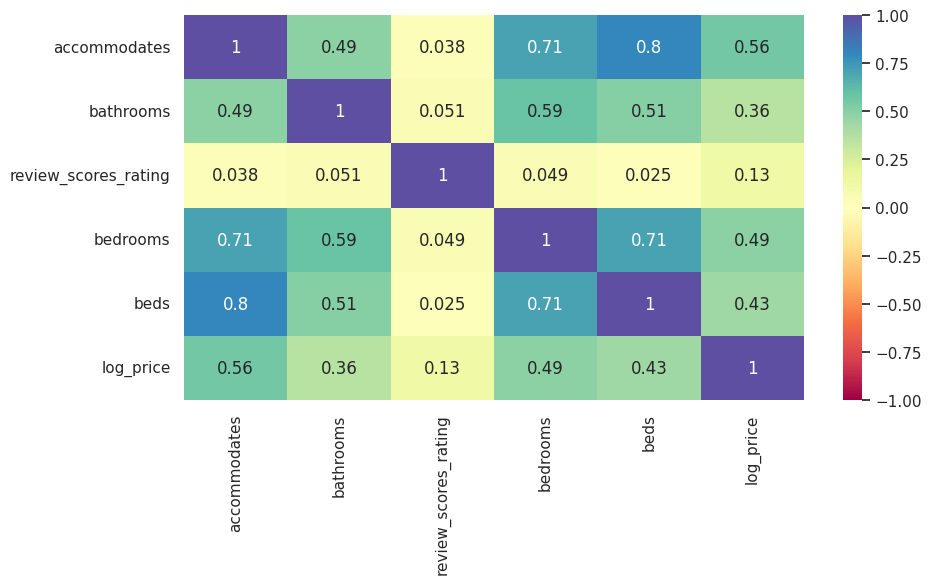

In [160]:
plt.figure(figsize=(10,5))
sns.heatmap(df_numeric.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**Key observations from the pairplot and correlation matrix**



1. Log price is normally distributed where as actual price has a strong right skew suggesting a long tail of few highly priced rentals
2. There does not seems to be a strong linear relationship between the indepedant variables and the log_price.
3.   Log price is normally distributed
4. Log price has a fairly strong positive correlation with accomodates, bathrooms, bedrooms and beds
5.   Log price has a weak positive correlation with reviews






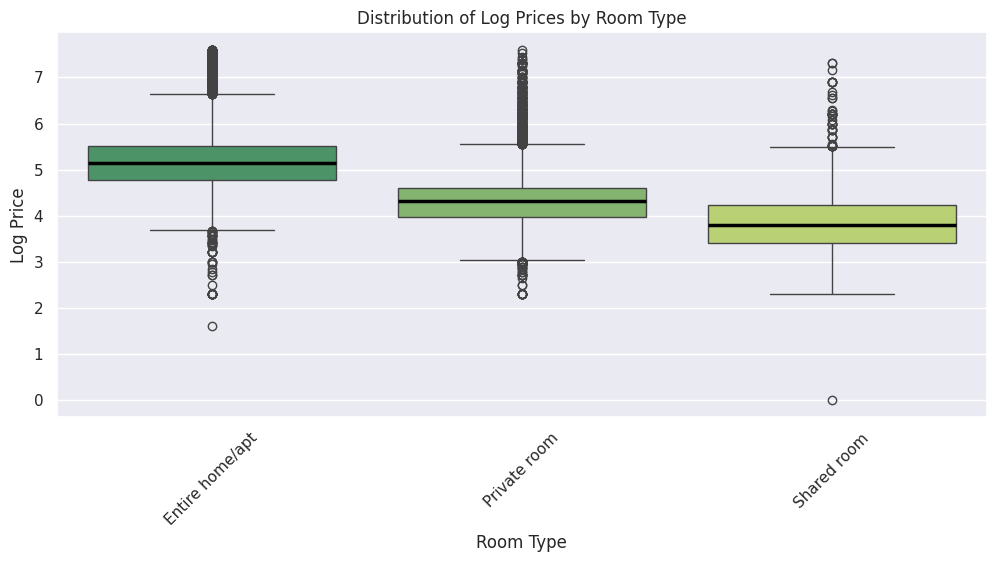

In [161]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="room_type", y="log_price", data=df, palette='summer', medianprops=dict(color='black', linewidth=2.5))  # Adjust color and linewidth for median line
plt.xlabel("Room Type")
plt.ylabel("Log Price")
plt.title("Distribution of Log Prices by Room Type")
plt.xticks(rotation=45)
plt.show()



1.   Entire Home/apt has a higher price range followed by Private Room and Shared room. This means Entire homes/apt ret at a higher rate and there is higher demand for properties that rent out the entire place.
2.   Private room are in the middle range folowed by the cheapest rentals coming from shared room



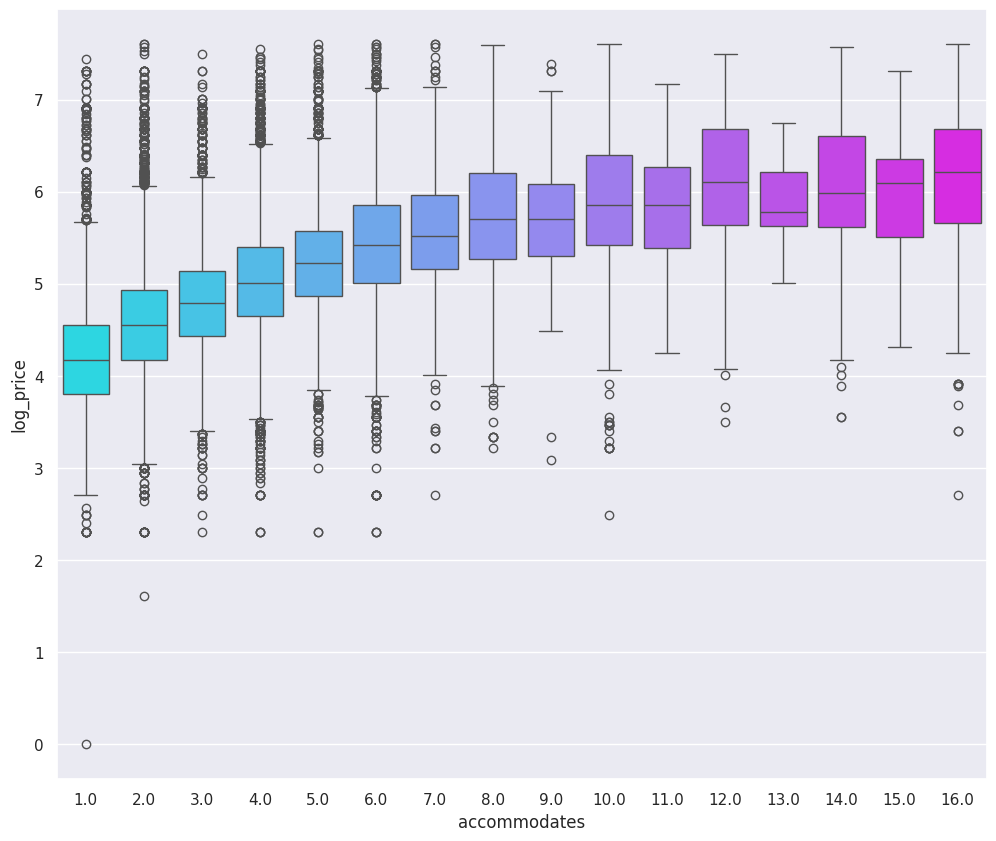

In [162]:
plt.figure(figsize=(12, 10))
sns.boxplot(x="accommodates", y="log_price", data=df,palette='cool')
plt.show()

As accomodates number goes up, log price increases. This is consistent with the intuition as larger properties will have a higher rent

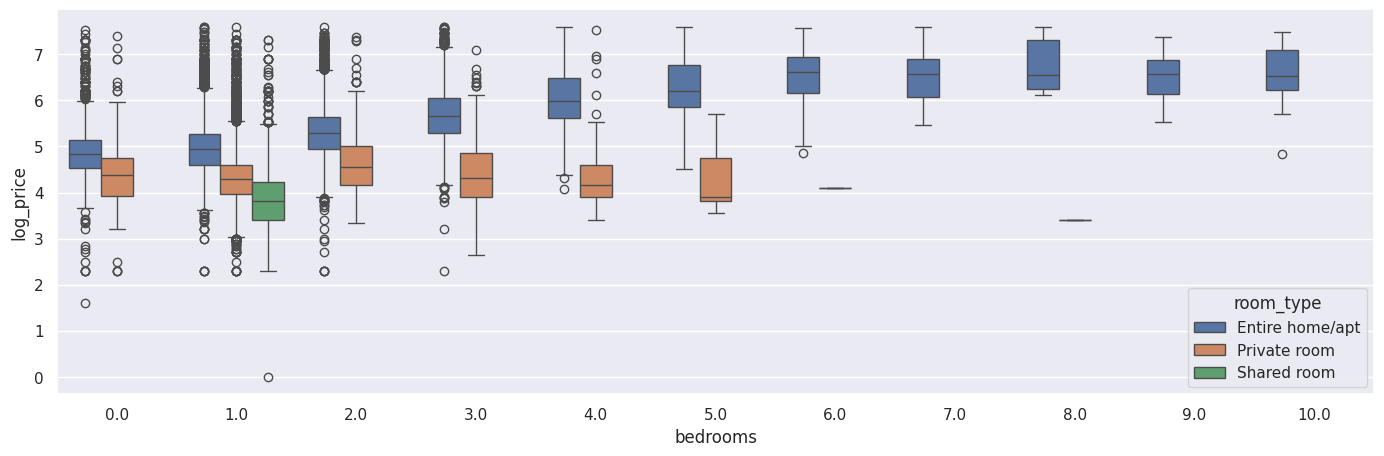

In [163]:
plt.figure(figsize=(17, 5))
sns.boxplot(x="bedrooms", y="log_price", data=df,hue='room_type')
plt.show()

As observed earlier, entire home/apts are the most expensive. This can be seen here as filter on the number of bedrooms. More each bedroom increment (going from 1 to 2 to 3), the gap between the rent of a Entire home and Private room increases. Properties over with 2 bedroom or more do not show any shared room options with properties over 5 bedrooms do not have Private or shared room options. This needs to be investigated further.

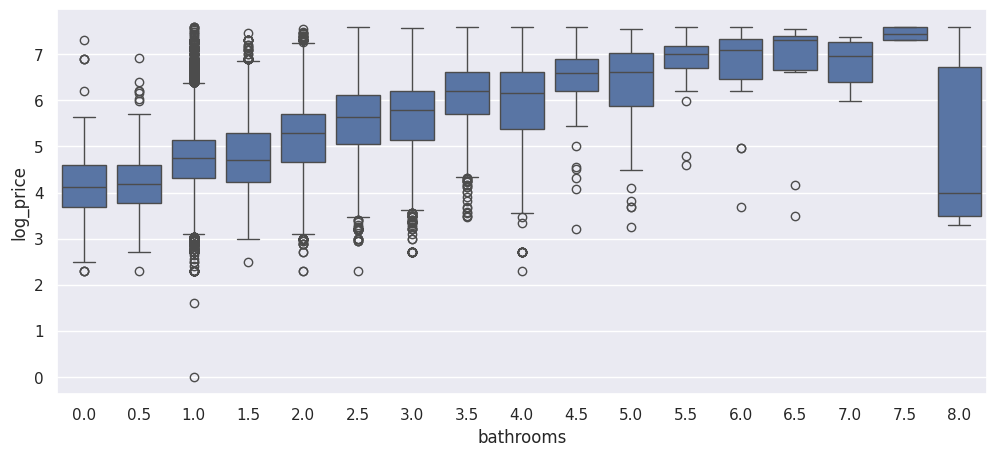

In [164]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="bathrooms", y="log_price", data=df)
plt.show()

s bathrooms increases, the log price increases. There is sharp median rent decline with properties having 8 bathrooms although the IQR is the largest among all bathroom numbers

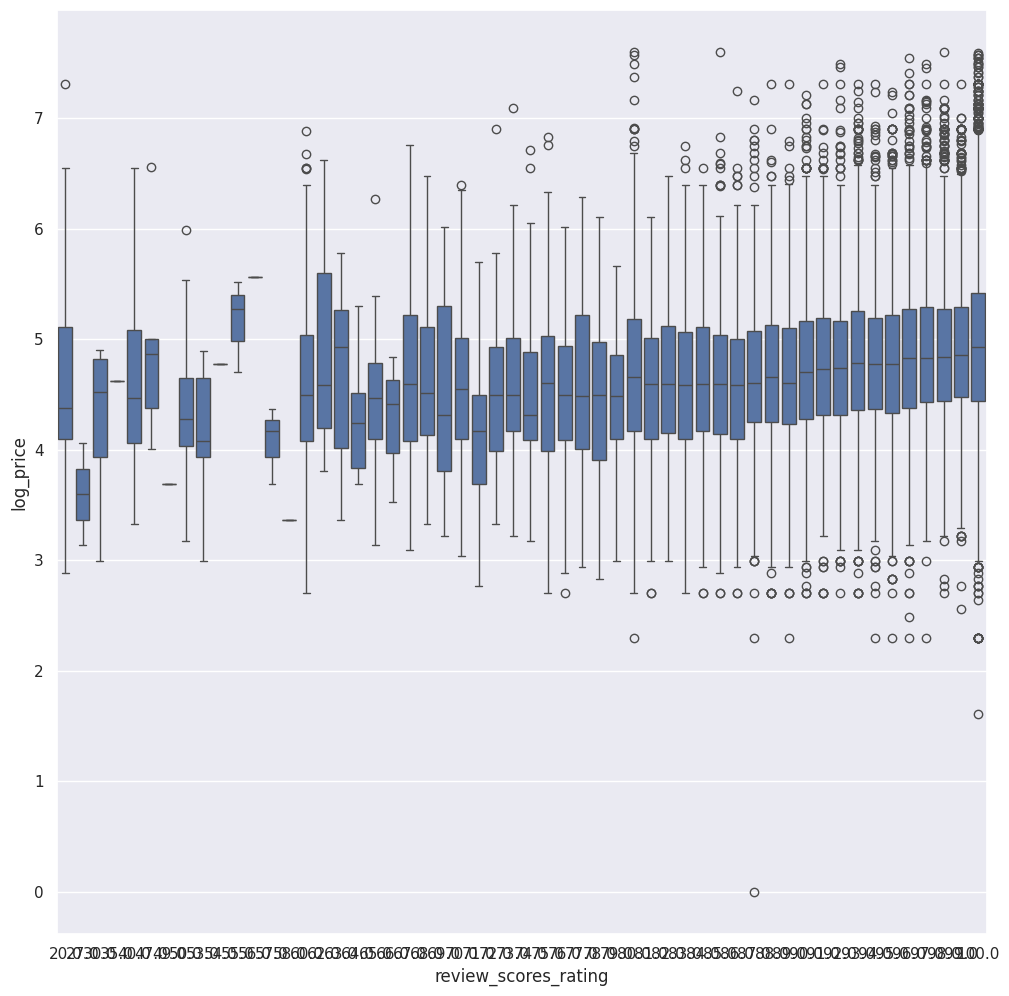

In [165]:
plt.figure(figsize=(12, 12))
sns.boxplot(x='review_scores_rating', y="log_price", data=df)
plt.show()

Most of the ratings given are for properties between log price 2.8 ($16) and 6.5 ($481) with the middle 50% of the reviews being given for properties between log price 3.5 ($33) to 5.5 ($244)
High ratings (80 and above) also exhibit the behavior above. Also there is a cluster of high ratings given to properties that are more expensive all the way to the most expensive properties renting at over $1000 to $3000

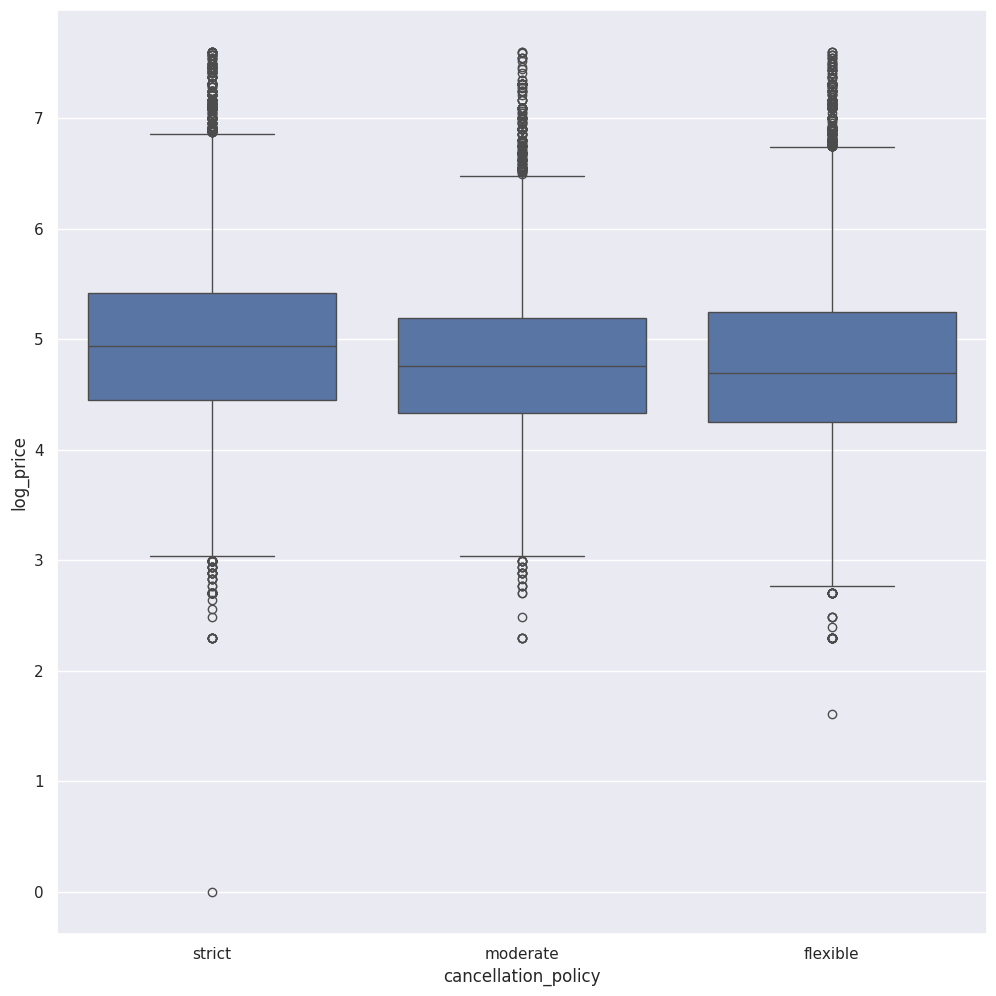

In [166]:
plt.figure(figsize=(12, 12))
sns.boxplot(x='cancellation_policy', y="log_price", data=df)
plt.show()

Cancellation polcies dont seem to have a large impact on the rental price of the property. Although the 'Strict' category has a higher price, it is not significantly different from the rest

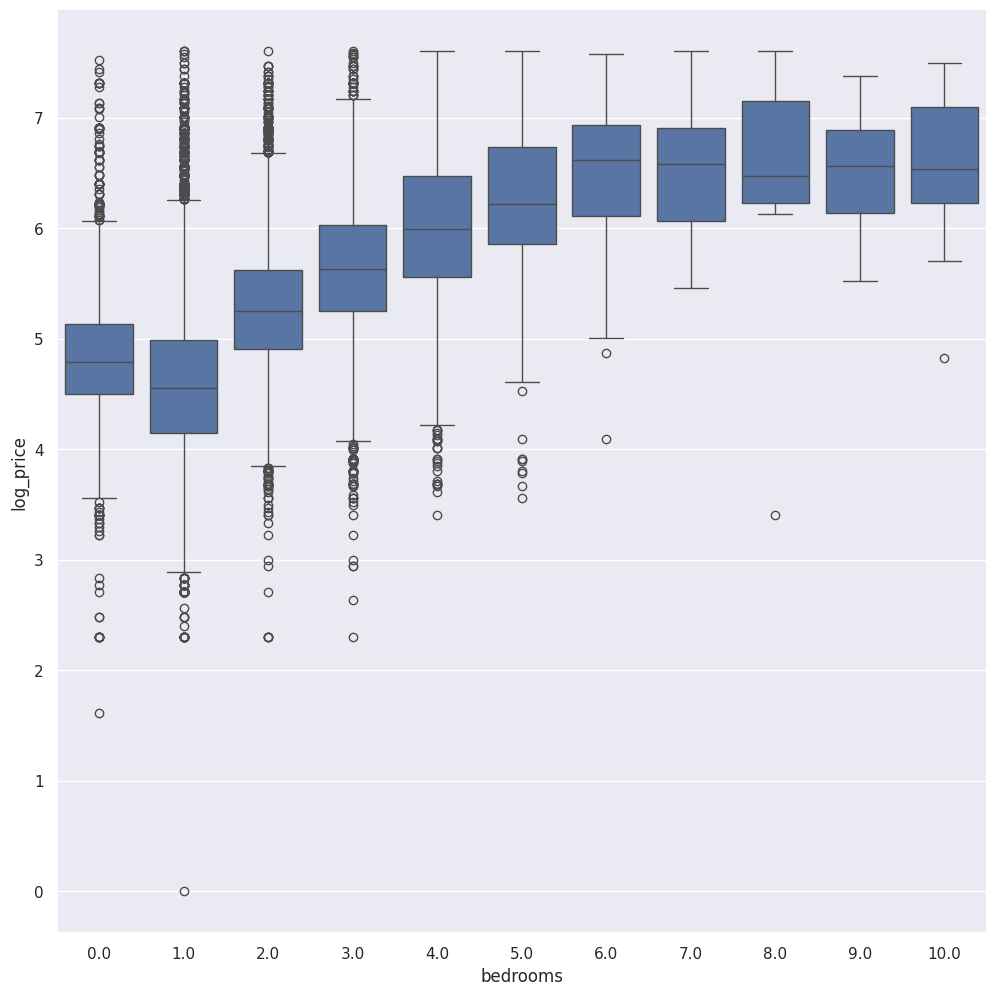

In [167]:
plt.figure(figsize=(12, 12))
sns.boxplot(x='bedrooms', y="log_price", data=df)
plt.show()

Bedrooms has a positive correlation and impact on the price. As number of bedrooms increase, the log price increases as well.

In [168]:
df_numeric=df.select_dtypes('float64','int64')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54117 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             54112 non-null  object 
 1   accommodates          54114 non-null  float64
 2   bathrooms             53922 non-null  float64
 3   cancellation_policy   54109 non-null  object 
 4   cleaning_fee          54113 non-null  object 
 5   instant_bookable      54117 non-null  bool   
 6   review_scores_rating  43902 non-null  float64
 7   bedrooms              54025 non-null  float64
 8   beds                  53992 non-null  float64
 9   log_price             54117 non-null  float64
 10  act_price             54117 non-null  int64  
dtypes: bool(1), float64(6), int64(1), object(3)
memory usage: 4.6+ MB


## Data Preprocessing

In [170]:
# Drop actual price from the dataframe
df.drop('act_price',axis=1, inplace=True)

In [171]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,False,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,True,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,True,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,False,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,True,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74104,Entire home/apt,2.0,1.0,strict,True,False,100.0,1.0,1.0,4.356709
74107,Entire home/apt,4.0,2.0,moderate,True,False,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,True,True,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,True,True,NaN,0.0,2.0,5.273000


# Treating null values

In [172]:
data.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

Since the number of null values for the following features room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,bedrooms,beds are low, we shall drop these rows entirely

In [173]:
df.dropna(subset=['room_type','accommodates','bathrooms','cancellation_policy','cleaning_fee','bedrooms','beds'], inplace=True)

After we have droped the rows above, there are 10,133 rows having null for review_scores_rating. We shall impute them in the next step.

In [174]:
df.isnull().sum()

room_type                   0
accommodates                0
bathrooms                   0
cancellation_policy         0
cleaning_fee                0
instant_bookable            0
review_scores_rating    10133
bedrooms                    0
beds                        0
log_price                   0
dtype: int64

We shall impute these values using the median value for review_scores_rating

In [175]:
df['review_scores_rating'] = df.groupby(["bedrooms"])['review_scores_rating'].transform(
  lambda x: x.fillna(x.median()))

No null values exist in the dataframe.

In [176]:
df.isnull().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [177]:
# Checking the new shape for the dataframe
df.shape

(53767, 10)

#Outlier Detection and Treatment

In [178]:
# Create non numerical column list
nonnumeric_columns = df.select_dtypes(exclude=np.number).columns.tolist()
nonnumeric_columns

['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable']

In [179]:
# Create numerical column list
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['accommodates',
 'bathrooms',
 'review_scores_rating',
 'bedrooms',
 'beds',
 'log_price']

The boxplots below show the outliers. We will treat them in the next step

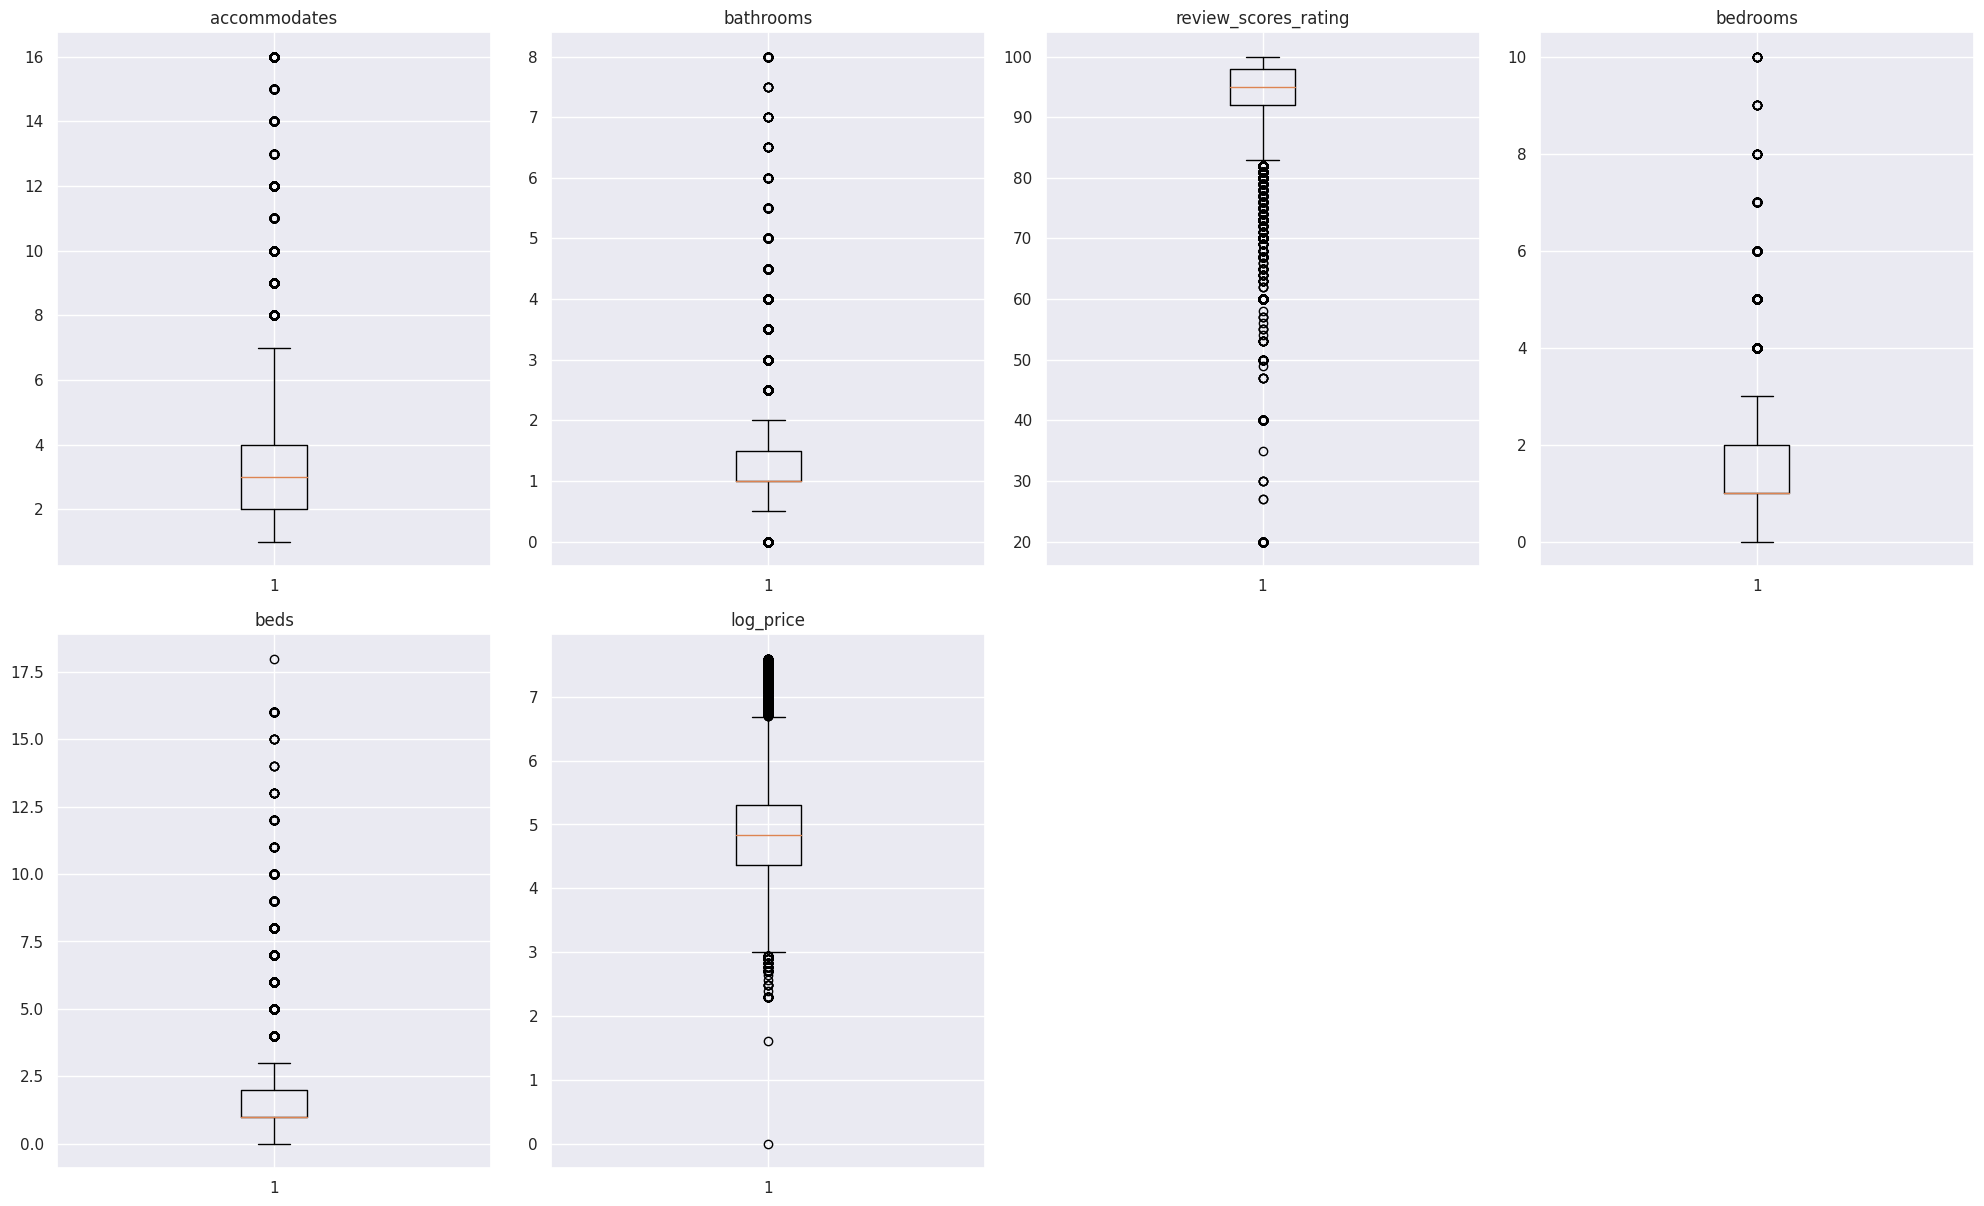

In [180]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [182]:
# Treat Outlier function
def treat_outliers(df, col):
    """
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # complete the code for 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(
        df[col], Lower_Whisker, Upper_Whisker
    )  # all thealues samller than Lower_Whisker will be assigned value of Lower_whisker
    # and all the values above upper_whishker will be assigned value of upper_Whisker
    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [183]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()

In [184]:
numerical_col

['accommodates',
 'bathrooms',
 'review_scores_rating',
 'bedrooms',
 'beds',
 'log_price']

In [185]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

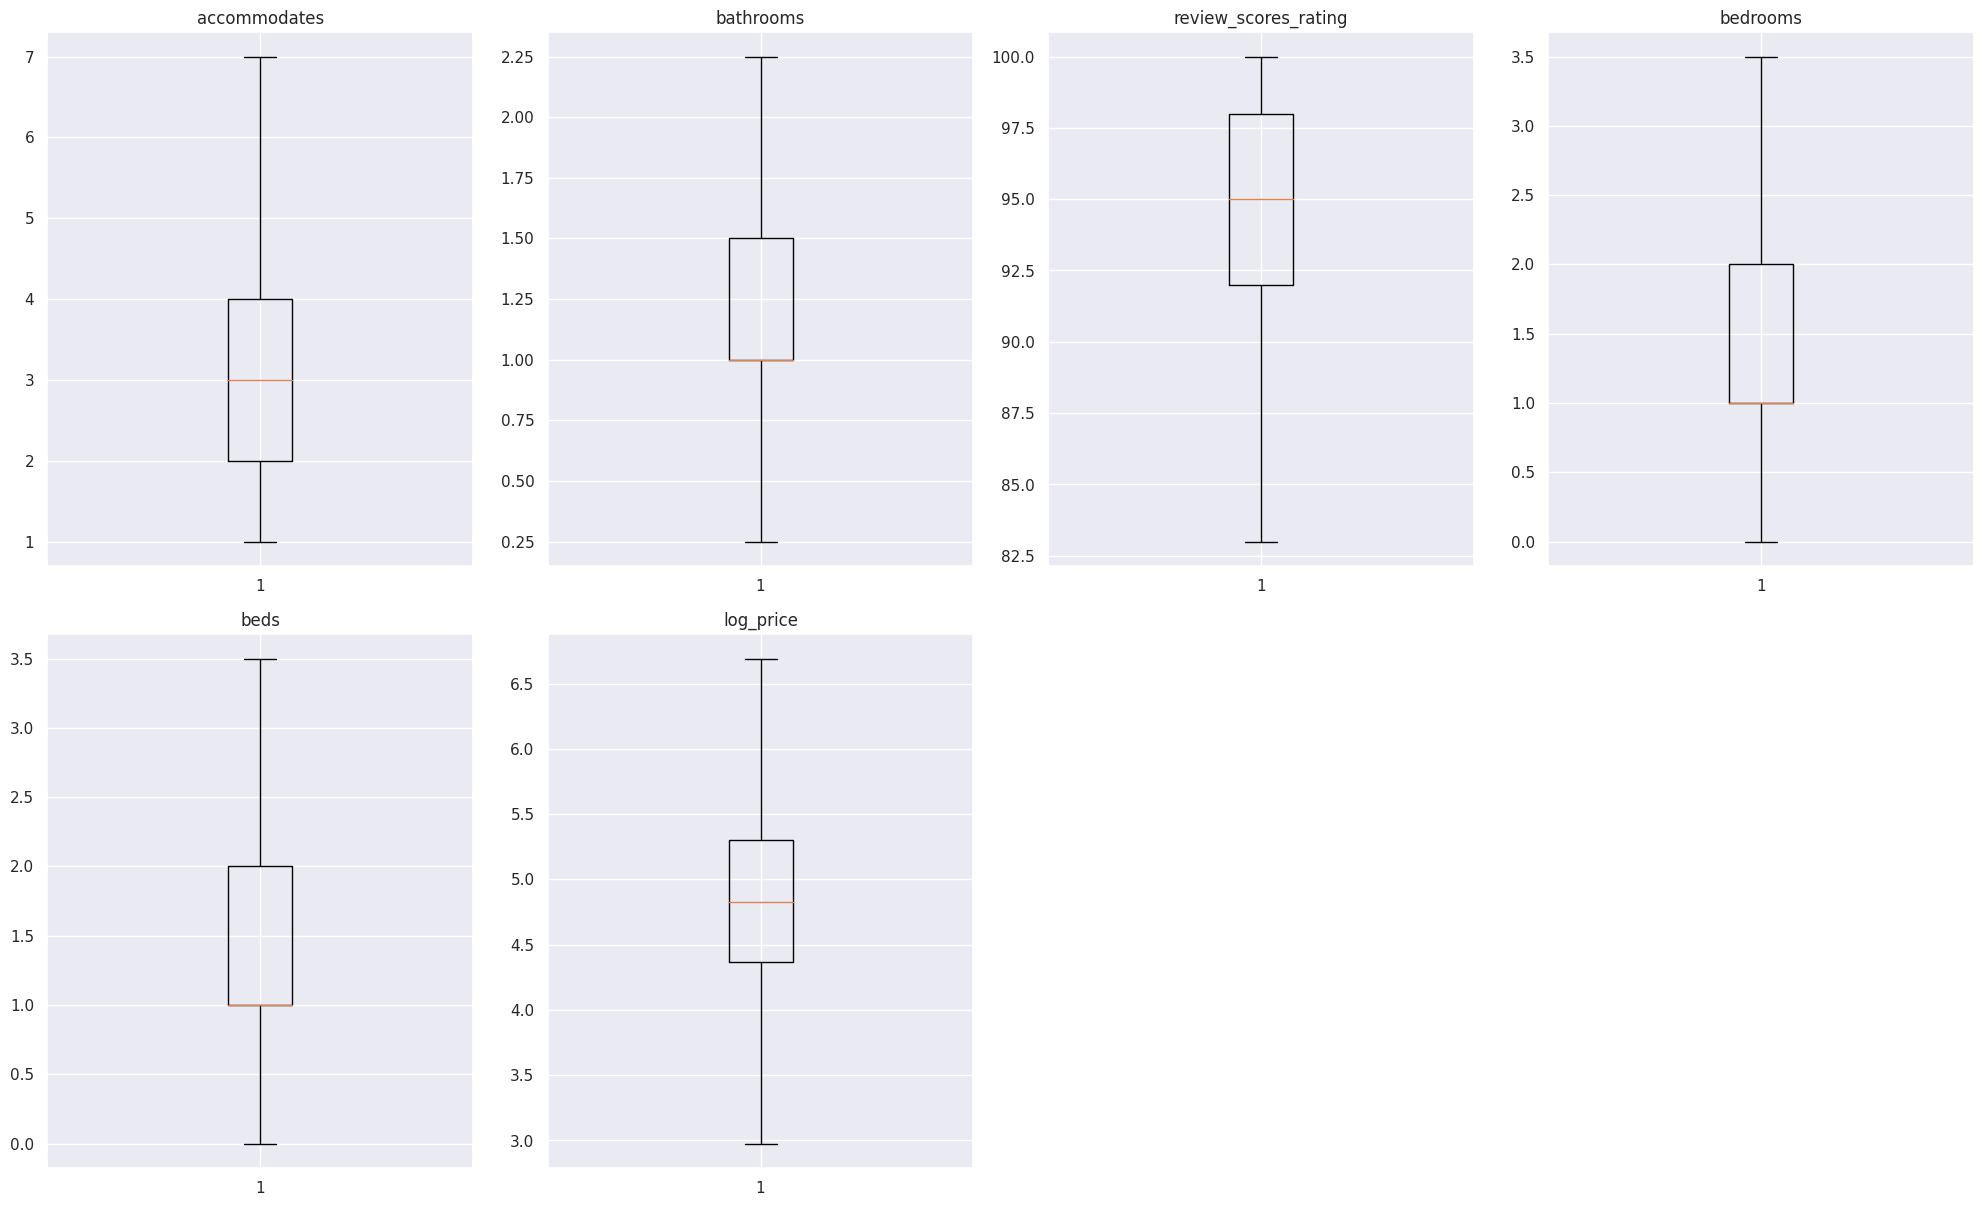

In [186]:
# let's look at the boxplots to see if the outliers have been treated or not

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

# Model Building - Linear Regression

For this model, we will
1.   Create a linear model with all feature
2.   Will use imputed data for NaN values for 'review_scores_rating'


In [187]:
bool_cols = ["cleaning_fee", "instant_bookable"]
df[bool_cols] = df[bool_cols].astype(int) # complete the code to conver the boolean columns to integer type

df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1,0,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1,1,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1,1,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1,0,96.0,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1,1,83.0,0.0,1.0,4.744932


In [188]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [189]:
# defining the dependent and independent variables
X = df.drop(["log_price"], axis=1)
y = df["log_price"]

In [190]:
# creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object"]).columns.tolist(),
    drop_first=True)  ## Complete the code to create dummies for independent features

X

,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict
0,3.0,1.0,1,0,100.0,1.0,1.0,0,0,0,1
1,7.0,1.0,1,1,93.0,3.0,3.0,0,0,0,1
2,5.0,1.0,1,1,92.0,1.0,3.0,0,0,1,0
3,4.0,1.0,1,0,96.0,2.0,2.0,0,0,0,0
4,2.0,1.0,1,1,83.0,0.0,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1,0,100.0,1.0,1.0,0,0,0,1
74107,4.0,2.0,1,0,93.0,2.0,3.5,0,0,1,0
74108,5.0,1.0,1,1,94.0,2.0,2.0,0,0,1,0
74109,2.0,1.0,1,1,95.0,0.0,2.0,0,0,0,1


In [191]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1) ## Complete the code to split the data into train and test in specified ratio

In [192]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 37636
Number of rows in test data = 16131


In [193]:
# fitting the linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [194]:
# Checking model performance on train set
lin_reg_model_perf_train = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_perf_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.514675,0.400402,0.509284,0.509141,8.395978


In [286]:
# checking model performance on test set
print("Test Performance\n")
lin_reg_model_perf_test = model_performance_regression(lin_reg_model,x_test,y_test) ## Complete the code to check the performance on test data
lin_reg_model_perf_test

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.519183,0.401512,0.508171,0.507836,8.399069


In [287]:
# let's check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
accommodates,0.093038
bathrooms,0.180044
cleaning_fee,-0.073695
instant_bookable,-0.060825
review_scores_rating,0.013585
bedrooms,0.156329
beds,-0.044287
room_type_Private room,-0.611322
room_type_Shared room,-1.057035
cancellation_policy_moderate,-0.063219


In [ ]:
# Let us write the equation of linear regression

Equation = "Log Price = " + str(lin_reg_model.intercept_)
print(Equation, end=" ")

for i in range(len(x_train.columns)):
    if i != len(x_train.columns) - 1:
        print(
            "+ (",
            lin_reg_model.coef_[i],
            ")*(",
            x_train.columns[i],
            ")",
            end="  ",
        )
    else:
        print("+ (", lin_reg_model.coef_[i], ")*(", x_train.columns[i], ")")

Log Price = 3.250565419004717 + ( 0.09303828428613167 )*( accommodates )  + ( 0.18004375667656985 )*( bathrooms )  + ( -0.073695471578413 )*( cleaning_fee )  + ( -0.06082497647940327 )*( instant_bookable )  + ( 0.01358489565900839 )*( review_scores_rating )  + ( 0.15632945464498813 )*( bedrooms )  + ( -0.04428680014893294 )*( beds )  + ( -0.6113215020902066 )*( room_type_Private room )  + ( -1.0570351345474824 )*( room_type_Shared room )  + ( -0.06321861428948379 )*( cancellation_policy_moderate )  + ( -0.0019582067812345325 )*( cancellation_policy_strict )


The linear model is

Log Price = 3.250565419004717 + ( 0.09303828428613167 )*( accommodates )  + ( 0.18004375667656985 )*( bathrooms )  + ( -0.073695471578413 )*( cleaning_fee )  + ( -0.06082497647940327 )*( instant_bookable )  + ( 0.01358489565900839 )*( review_scores_rating )  + ( 0.15632945464498813 )*( bedrooms )  + ( -0.04428680014893294 )*( beds )  + ( -0.6113215020902066 )*( room_type_Private room )  + ( -1.0570351345474824 )*( room_type_Shared room )  + ( -0.06321861428948379 )*( cancellation_policy_moderate )  + ( -0.0019582067812345325 )*( cancellation_policy_strict )


#Model without Cancellation Policy

For this model, we will
1.   Create a linear model with all feature except the 'cancellation_policy' feature
2.   Will use imputed data for NaN values for 'review_scores_rating'


Since Cancellation Policy does not have a high impact on the log price, lets run the regression model without the cancellation policy

In [196]:
# defining the dependent and independent variables
X_new = df.drop(["log_price","cancellation_policy"], axis=1)
y_new = df["log_price"]

In [197]:
X_new

,room_type,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds
0,Entire home/apt,3.0,1.0,1,0,100.0,1.0,1.0
1,Entire home/apt,7.0,1.0,1,1,93.0,3.0,3.0
2,Entire home/apt,5.0,1.0,1,1,92.0,1.0,3.0
3,Entire home/apt,4.0,1.0,1,0,96.0,2.0,2.0
4,Entire home/apt,2.0,1.0,1,1,83.0,0.0,1.0
...,...,...,...,...,...,...,...,...
74104,Entire home/apt,2.0,1.0,1,0,100.0,1.0,1.0
74107,Entire home/apt,4.0,2.0,1,0,93.0,2.0,3.5
74108,Entire home/apt,5.0,1.0,1,1,94.0,2.0,2.0
74109,Entire home/apt,2.0,1.0,1,1,95.0,0.0,2.0


In [198]:
# creating dummy variables
X_new = pd.get_dummies(X_new, columns=X_new.select_dtypes(include=["object","category"]).columns.tolist(),
    drop_first=True)  ## Complete the code to create dummies for independent features

X_new

,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room
0,3.0,1.0,1,0,100.0,1.0,1.0,0,0
1,7.0,1.0,1,1,93.0,3.0,3.0,0,0
2,5.0,1.0,1,1,92.0,1.0,3.0,0,0
3,4.0,1.0,1,0,96.0,2.0,2.0,0,0
4,2.0,1.0,1,1,83.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1,0,100.0,1.0,1.0,0,0
74107,4.0,2.0,1,0,93.0,2.0,3.5,0,0
74108,5.0,1.0,1,1,94.0,2.0,2.0,0,0
74109,2.0,1.0,1,1,95.0,0.0,2.0,0,0


In [199]:
# splitting the data in 70:30 ratio for train to test data
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_new,y_new,test_size=0.3,random_state=1) ## Complete the code to split the data into train and test in specified ratio

In [200]:
print("Number of rows in train data =", x_train1.shape[0])
print("Number of rows in test data =", x_test1.shape[0])

Number of rows in train data = 37636
Number of rows in test data = 16131


In [201]:
# fitting the linear model
lin_reg_model1 = LinearRegression()
lin_reg_model1.fit(x_train1, y_train1)

LinearRegression()

In [202]:
# Checking model performance on train set
lin_reg_model_perf_train1 = model_performance_regression(lin_reg_model1, x_train1, y_train1)
lin_reg_model_perf_train1

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.515392,0.400943,0.507917,0.507799,8.404899


In [203]:
# checking model performance on test set
print("Test Performance\n")
lin_reg_model_perf_test1 = model_performance_regression(lin_reg_model1,x_test1,y_test1) ## Complete the code to check the performance on test data
lin_reg_model_perf_test1

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.519759,0.40207,0.507078,0.506803,8.40774


In [204]:
# let's check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model1.coef_, lin_reg_model1.intercept_),
    index=x_train1.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
accommodates,0.093480
bathrooms,0.183029
cleaning_fee,-0.078850
instant_bookable,-0.059581
review_scores_rating,0.013260
bedrooms,0.157056
beds,-0.044110
room_type_Private room,-0.611993
room_type_Shared room,-1.053862
Intercept,3.260617


In [205]:
# Let us write the equation of linear regression

Equation = "Log Price = " + str(lin_reg_model1.intercept_)
print(Equation, end=" ")

for i in range(len(x_train1.columns)):
    if i != len(x_train1.columns) - 1:
        print(
            "+ (",
            lin_reg_model1.coef_[i],
            ")*(",
            x_train1.columns[i],
            ")",
            end="  ",
        )
    else:
        print("+ (", lin_reg_model1.coef_[i], ")*(", x_train1.columns[i], ")")

Log Price = 3.260617266665327 + ( 0.09347978166494314 )*( accommodates )  + ( 0.18302859810744332 )*( bathrooms )  + ( -0.07885037979394213 )*( cleaning_fee )  + ( -0.059581380421832114 )*( instant_bookable )  + ( 0.013259776078576813 )*( review_scores_rating )  + ( 0.15705646868058148 )*( bedrooms )  + ( -0.04411026599439399 )*( beds )  + ( -0.6119931422955973 )*( room_type_Private room )  + ( -1.0538619714761057 )*( room_type_Shared room )


The linear model is

Log Price = 3.260617266665327 + ( 0.09347978166494314 )*( accommodates )  + ( 0.18302859810744332 )*( bathrooms )  + ( -0.07885037979394213 )*( cleaning_fee )  + ( -0.059581380421832114 )*( instant_bookable )  + ( 0.013259776078576813 )*( review_scores_rating )  + ( 0.15705646868058148 )*( bedrooms )  + ( -0.04411026599439399 )*( beds )  + ( -0.6119931422955973 )*( room_type_Private room )  + ( -1.0538619714761057 )*( room_type_Shared room )


#Linear Regression by dropping all null values from all features

For this model, we will
1.   Create a linear model with all feature including the 'cancellation_policy' feature
2.   Drop all null values from all features

In [266]:
df1=data.copy()

In [267]:
df1.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [268]:
df1.drop("id", axis=1, inplace=True)

In [269]:
df1.shape

(74111, 10)

In [299]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57119 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             57119 non-null  object 
 1   accommodates          57119 non-null  float64
 2   bathrooms             57119 non-null  float64
 3   cancellation_policy   57119 non-null  object 
 4   cleaning_fee          57119 non-null  object 
 5   instant_bookable      57119 non-null  object 
 6   review_scores_rating  57119 non-null  float64
 7   bedrooms              57119 non-null  float64
 8   beds                  57119 non-null  float64
 9   log_price             57119 non-null  float64
dtypes: float64(6), object(4)
memory usage: 4.8+ MB


In [270]:
#Dropping null values from all features
df1.dropna(subset=['room_type','accommodates','bathrooms','cancellation_policy','cleaning_fee','bedrooms','beds','review_scores_rating'], inplace=True)

In [271]:
#Checking the shape
df1.shape

(57119, 10)

In [272]:
# defining the dependent and independent variables
X2= df1.drop(["log_price"], axis=1)
y2= df1["log_price"]

In [273]:
# creating dummy variables
X2 = pd.get_dummies(X2, columns=X2.select_dtypes(include=["object","category"]).columns.tolist(),
    drop_first=True)  ## Complete the code to create dummies for independent features

X2

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_t
0,3.0,1.0,100.0,1.0,1.0,0,0,0,1,1,0
1,7.0,1.0,93.0,3.0,3.0,0,0,0,1,1,1
2,5.0,1.0,92.0,1.0,3.0,0,0,1,0,1,1
4,2.0,1.0,40.0,0.0,1.0,0,0,1,0,1,1
5,2.0,1.0,100.0,1.0,1.0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,100.0,1.0,1.0,0,0,0,1,1,0
74105,2.0,1.0,91.0,1.0,1.0,1,0,1,0,1,0
74107,4.0,2.0,93.0,2.0,4.0,0,0,1,0,1,0
74108,5.0,1.0,94.0,2.0,2.0,0,0,1,0,1,1


In [274]:
df1.shape

(57119, 10)

In [275]:
# splitting the data in 70:30 ratio for train to test data
x2_train, x2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3,random_state=1) ## Complete the code to split the data into train and test in specified ratio

In [276]:
print("Number of rows in train data =", x2_train.shape[0])
print("Number of rows in test data =", x2_test.shape[0])

Number of rows in train data = 39983
Number of rows in test data = 17136


In [277]:
# fitting the linear model
lin2 = LinearRegression()
lin2.fit(x2_train, y2_train)

LinearRegression()

In [283]:
# Checking model performance on train set
lin2train = model_performance_regression(lin2, x2_train, y2_train)
lin2train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.442963,0.343879,0.561133,0.561012,inf


In [282]:
# checking model performance on test set
print("Test Performance\n")
lin2test = model_performance_regression(lin2,x2_test,y2_test) ## Complete the code to check the performance on test data
lin2test

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.43816,0.341661,0.571624,0.571349,7.339931


In [289]:
# Let us write the equation of linear regression

Equation = "Log Price = " + str(lin2.intercept_)
print(Equation, end=" ")

for i in range(len(x2_train.columns)):
    if i != len(x2_train.columns) - 1:
        print(
            "+ (",
            lin2.coef_[i],
            ")*(",
            x2_train.columns[i],
            ")",
            end="  ",
        )
    else:
        print("+ (", lin2.coef_[i], ")*(", x2_train.columns[i], ")")

Log Price = 3.9547610120099908 + ( 0.06729896364996851 )*( accommodates )  + ( 0.1286349028743515 )*( bathrooms )  + ( 0.005798275559542682 )*( review_scores_rating )  + ( 0.16164177040334726 )*( bedrooms )  + ( -0.04064185113441096 )*( beds )  + ( -0.6231849812329194 )*( room_type_Private room )  + ( -1.1340457170573894 )*( room_type_Shared room )  + ( 0.01851722054289955 )*( cancellation_policy_moderate )  + ( 0.06091725782316405 )*( cancellation_policy_strict )  + ( 0.0012264917332165774 )*( cleaning_fee_True )  + ( -0.06201235547152324 )*( instant_bookable_t )


The linear model is

Log Price = 3.9547610120099908 + ( 0.06729896364996851 )*( accommodates )  + ( 0.1286349028743515 )*( bathrooms )  + ( 0.005798275559542682 )*( review_scores_rating )  + ( 0.16164177040334726 )*( bedrooms )  + ( -0.04064185113441096 )*( beds )  + ( -0.6231849812329194 )*( room_type_Private room )  + ( -1.1340457170573894 )*( room_type_Shared room )  + ( 0.01851722054289955 )*( cancellation_policy_moderate )  + ( 0.06091725782316405 )*( cancellation_policy_strict )  + ( 0.0012264917332165774 )*( cleaning_fee_True )  + ( -0.06201235547152324 )*( instant_bookable_t )


#Model Performance Check

In [284]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_perf_train.T,lin_reg_model_perf_train1.T,lin2train.T], axis=1
)

models_train_comp_df.columns =["LR with all features - Imputing Reviews","LR without Cancellation policy - Imputing Reviews","LR dropping all null values including Reviews",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,LR with all features - Imputing Reviews,LR without Cancellation policy - Imputing Reviews,LR dropping all null values including Reviews
RMSE,0.514675,0.515392,0.442963
MAE,0.400402,0.400943,0.343879
R-squared,0.509284,0.507917,0.561133
Adj. R-squared,0.509141,0.507799,0.561012
MAPE,8.395978,8.404899,inf


In [288]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_perf_test.T,lin_reg_model_perf_test1.T,lin2test.T], axis=1
)

models_test_comp_df.columns =["LR with all features - Imputing Reviews","LR without Cancellation policy - Imputing Reviews","LR dropping all null values including Reviews",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,LR with all features - Imputing Reviews,LR without Cancellation policy - Imputing Reviews,LR dropping all null values including Reviews
RMSE,0.519183,0.519759,0.438160
MAE,0.401512,0.402070,0.341661
R-squared,0.508171,0.507078,0.571624
Adj. R-squared,0.507836,0.506803,0.571349
MAPE,8.399069,8.407740,7.339931


#Actionable Insights and Recommendations

1. Based on the test results we see that the model where all null values have been dropped performs the best. This has the lowest RMSE, MAE and MAPE scores. The R2 and Adjusted R2 is the highest at 57%
2. The most important features that have a significant positive impact on the log price are bathrooms (18%) followed by bedrooms (16%) followed by bathrooms (12.8%) followed by total accomodation and a strict cancellation policy
3. From Airbnb's perspective, the business should promote entire home/apt properties with 2+ bedrooms and 2+ bathrooms as these are the most in demand
4. Further analysis is required pn why over 10,000 properties did not receive a rating. Is it a data capture error or guests did not leave a rating because the experience was neutral. Based on a quick look into the properties with null ratings, it is clear that these are more expensive properties with a mean log price of 5

# Supplementary - Quick peek into the properties with null ratings

In [290]:
df_rating=data.copy()

In [293]:
df_rating.shape

(16722, 11)

In [296]:
# drop the id column as it does not add any value to the analysis
df_rating.drop("id", axis=1, inplace=True)

In [297]:
# Finding and dropping duplicate values and finding the new shape
df_rating.drop_duplicates(inplace=True)
df_rating.shape

(10215, 10)

In [298]:
df_rating.describe().round().T

,count,mean,std,min,25%,50%,75%,max
accommodates,10213.0,4.0,2.0,1.0,2.0,3.0,4.0,16.0
bathrooms,10178.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0
review_scores_rating,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,10194.0,1.0,1.0,0.0,1.0,1.0,2.0,10.0
beds,10152.0,2.0,1.0,0.0,1.0,1.0,2.0,16.0
log_price,10215.0,5.0,1.0,2.0,4.0,5.0,6.0,8.0


In [292]:
df_rating

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
12,14066228,Private room,2.0,1.0,flexible,True,f,NaN,1.0,1.0,4.248495
15,6226658,Private room,2.0,1.5,moderate,True,f,NaN,1.0,1.0,4.094345
24,2479317,Entire home/apt,4.0,1.0,moderate,True,f,NaN,1.0,2.0,6.956545
31,5520582,Private room,2.0,1.0,strict,True,f,NaN,1.0,1.0,3.828641
...,...,...,...,...,...,...,...,...,...,...,...
74083,15423281,Private room,2.0,1.0,flexible,False,f,NaN,1.0,1.0,5.010635
74089,4550722,Private room,2.0,1.0,strict,True,f,NaN,1.0,1.0,4.605170
74095,2278677,Entire home/apt,2.0,1.0,flexible,False,f,NaN,1.0,1.0,4.382027
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170


In [291]:
df_rating=df_rating[df_rating['review_scores_rating'].isnull()]